In [11]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import plotly.express as px
import scipy.stats as stats

In [29]:
data = pd.read_csv(r'C:\Users\Mannahil Miftah\Downloads\heart_disease_uci.csv')
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Exploring Data

In [30]:
data.shape

(920, 16)

In [31]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [32]:
data.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [33]:
data.info

<bound method DataFrame.info of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False

In [34]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### Checking for missing/nan values

In [35]:
#printing values of all attributes to identify if any attribute has ?


allColumns = data.columns
for c in allColumns:
    missed = data[c].isin(['?']).sum()
    if missed > 0:
        print(c, "\t", missed)

In [36]:
data.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [37]:
data.dropna(inplace = True)

In [39]:
data.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#### Checking if any column contains wrong/unnecessary value

In [40]:
data['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76], dtype=int64)

In [41]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [42]:
data['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [43]:
data['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

In [44]:
data['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 160., 394., 184., 315., 409., 244., 195., 196.,
       126., 313., 259., 200., 262., 215., 228., 193., 271., 210., 327.,
       149., 295., 306., 178., 237., 218., 223., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [45]:
data['fbs'].unique()

array([True, False], dtype=object)

In [46]:
data['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [48]:
data['exang'].unique()

array([False, True], dtype=object)

In [49]:
data['oldpeak'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

In [50]:
data['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [51]:
data['ca'].unique()

array([0., 3., 2., 1.])

In [52]:
data['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [56]:
# 0 = No disease
# 1 = Stage 1 disease
# 2 = Stage 2 disease
# 3 = Stage 3 disease
# 4 = Stage 4 disease

data['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

#### Distributions & Visualizations

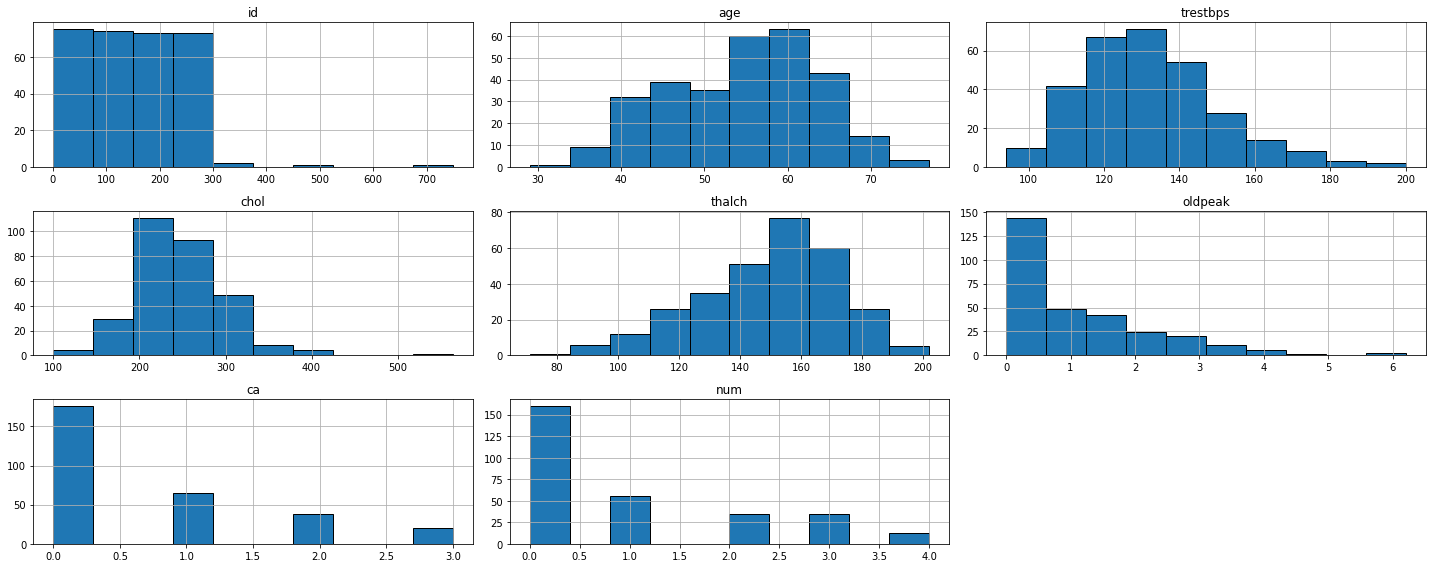

In [54]:
data.hist(bins = 10, figsize=[20,8], ec = 'black')
plt.tight_layout()
plt.show()

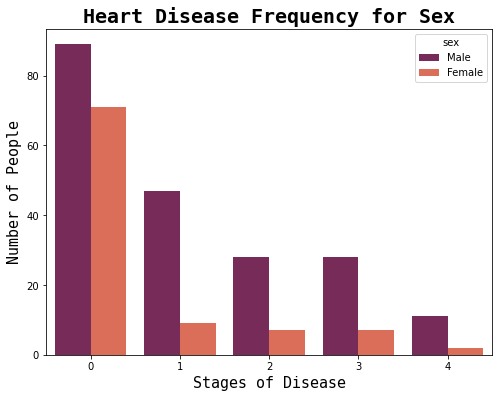

In [63]:
plt.figure(figsize=[8,6])
sb.countplot(data = data ,x = 'num', hue = 'sex',palette = 'rocket')
plt.title('Heart Disease Frequency for Sex', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Stages of Disease', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

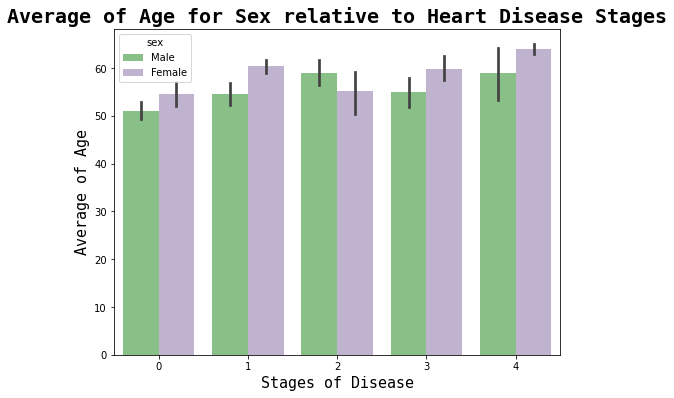

In [62]:
# Clustered Bar Chart

plt.figure(figsize=[8,6])
sb.barplot(data = data ,x = 'num', y = 'age', hue = 'sex', palette = 'Accent')
plt.title('Average of Age for Sex relative to Heart Disease Stages', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Stages of Disease', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

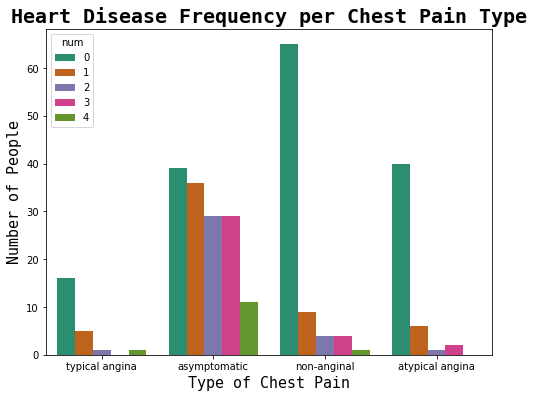

In [68]:
plt.figure(figsize=[8,6])
sb.countplot(data = data ,x = 'cp', hue = 'num',palette = 'Dark2')
plt.title('Heart Disease Frequency per Chest Pain Type', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Type of Chest Pain', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

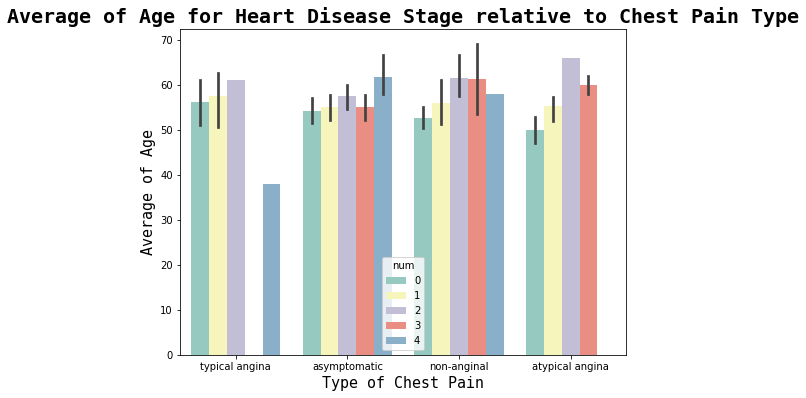

In [79]:
# Clustered Bar Chart

plt.figure(figsize=[8,6])
sb.barplot(data = data ,x = 'cp', y = 'age', hue = 'num', palette = 'Set3')
plt.title('Average of Age for Heart Disease Stage relative to Chest Pain Type', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Type of Chest Pain', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
#plt.legend(['No disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.show()

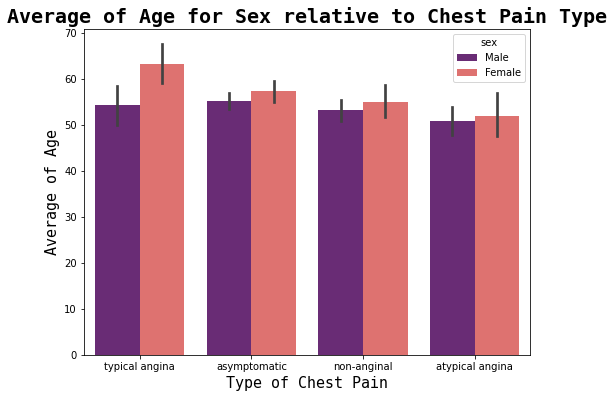

In [90]:
# Clustered Bar Chart

plt.figure(figsize=[8,6])
sb.barplot(data = data ,x = 'cp', y = 'age', hue = 'sex', palette = 'magma')
plt.title('Average of Age for Sex relative to Chest Pain Type', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Type of Chest Pain', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

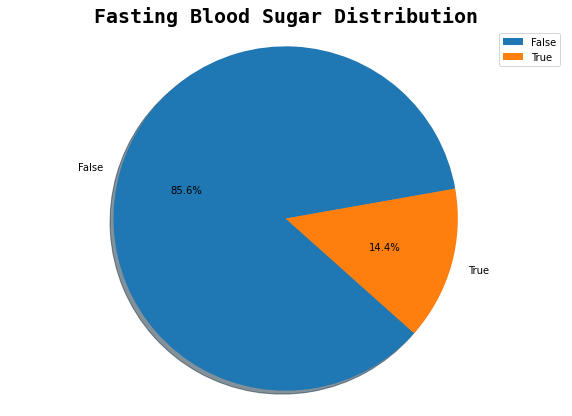

In [93]:
fbs = data['fbs'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(fbs.values, labels=fbs.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Fasting Blood Sugar Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

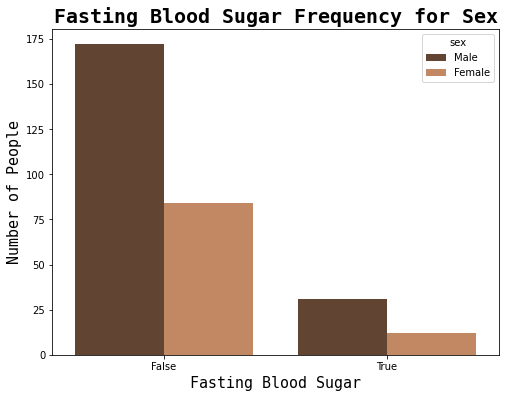

In [91]:
plt.figure(figsize=[8,6])
sb.countplot(data = data , x = 'fbs', hue = 'sex', palette = 'copper')
plt.title('Fasting Blood Sugar Frequency for Sex', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Fasting Blood Sugar', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

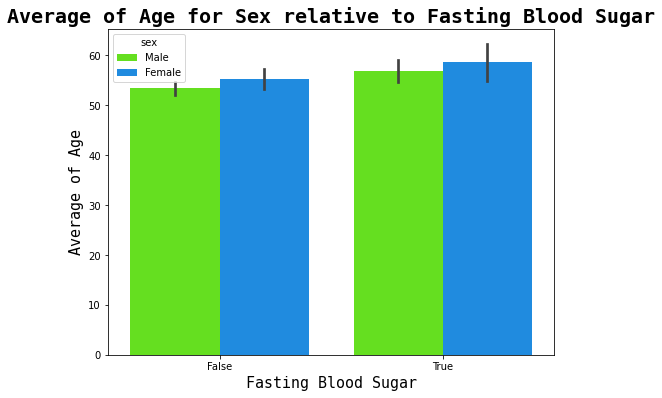

In [92]:
# Clustered Bar Chart

plt.figure(figsize=[8,6])
sb.barplot(data = data ,x = 'fbs', y = 'age', hue = 'sex', palette = 'gist_rainbow')
plt.title('Average of Age for Sex relative to Fasting Blood Sugar', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Fasting Blood Sugar', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


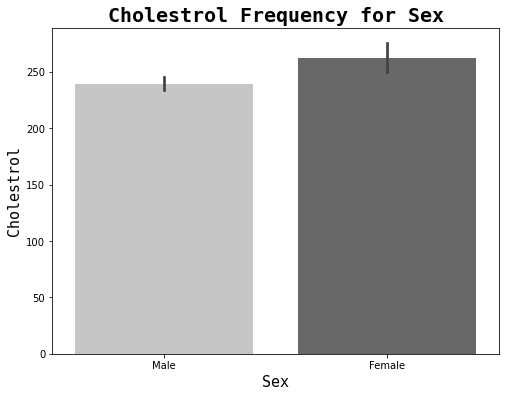

In [110]:
plt.figure(figsize=[8,6])
sb.barplot(data['sex'], data['chol'], palette = 'Greys')
plt.title('Cholestrol Frequency for Sex', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Cholestrol', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


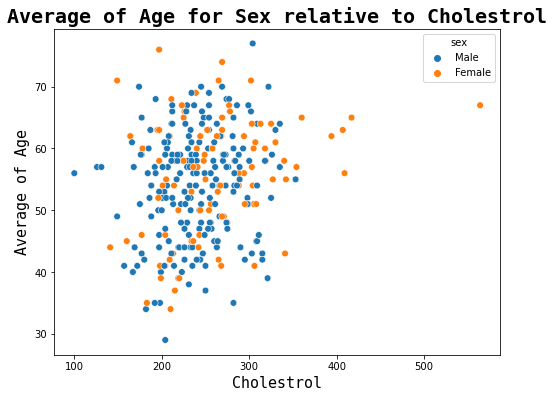

In [159]:
plt.figure(figsize=[8,6])
sb.scatterplot(data['chol'], data['age'], hue = data['sex'], s = 45)
plt.title('Average of Age for Sex relative to Cholestrol', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Cholestrol', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


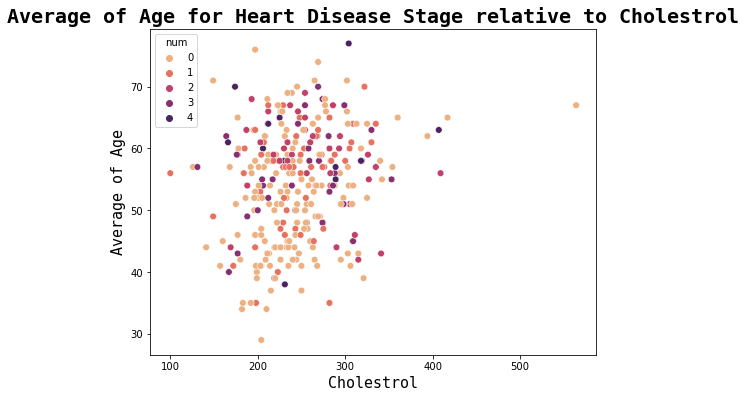

In [158]:
plt.figure(figsize=[8,6])
sb.scatterplot(data['chol'], data['age'], hue = data['num'], palette = 'flare', s = 45)
plt.title('Average of Age for Heart Disease Stage relative to Cholestrol', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Cholestrol', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


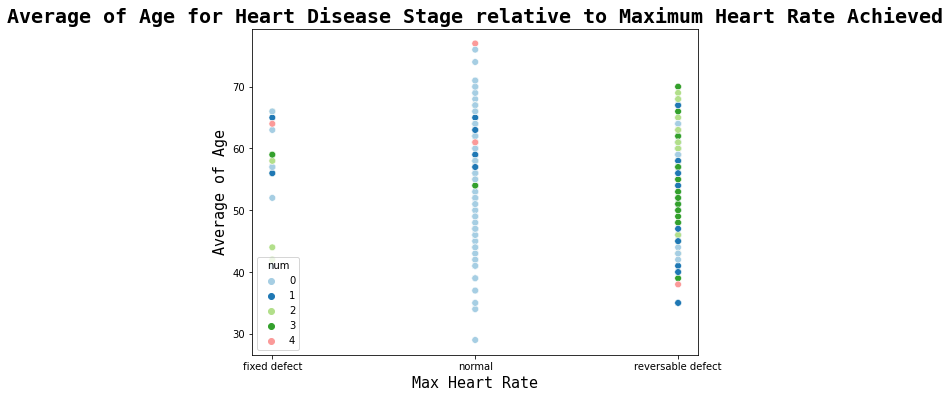

In [155]:
plt.figure(figsize=[8,6])
sb.scatterplot(data['thal'], data['age'], hue = data['num'], palette = 'Paired', s = 45)
plt.title('Average of Age for Heart Disease Stage relative to Maximum Heart Rate Achieved', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Max Heart Rate', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


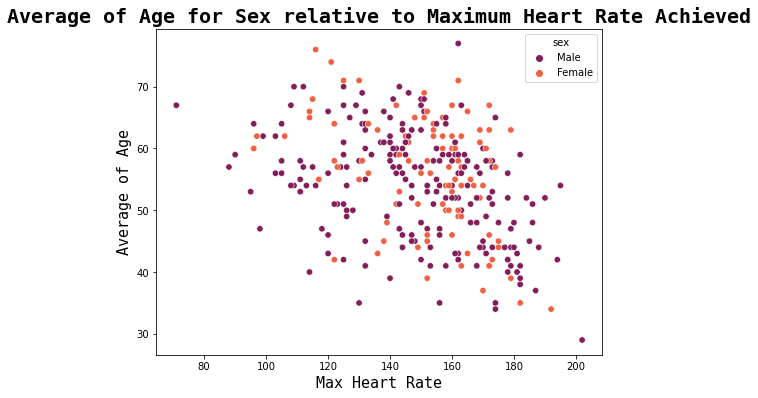

In [157]:
plt.figure(figsize=[8,6])
sb.scatterplot(data['thalch'], data['age'], hue = data['sex'], palette = 'rocket', s = 40)
plt.title('Average of Age for Sex relative to Maximum Heart Rate Achieved', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Max Heart Rate', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

#### Correlation

In [111]:
data.corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.001379,-0.021051,-0.138639,-0.159716,-0.091294,0.020103,0.031397
age,0.001379,1.000000,0.286149,0.199258,-0.384176,0.195929,0.362764,0.221787
trestbps,-0.021051,0.286149,1.000000,0.134240,-0.053320,0.191144,0.096641,0.159272
chol,-0.138639,0.199258,0.134240,1.000000,0.014894,0.033964,0.121907,0.065081
thalch,-0.159716,-0.384176,-0.053320,0.014894,1.000000,-0.348089,-0.256831,-0.416480
oldpeak,-0.091294,0.195929,0.191144,0.033964,-0.348089,1.000000,0.291958,0.501325
ca,0.020103,0.362764,0.096641,0.121907,-0.256831,0.291958,1.000000,0.520058
num,0.031397,0.221787,0.159272,0.065081,-0.416480,0.501325,0.520058,1.000000


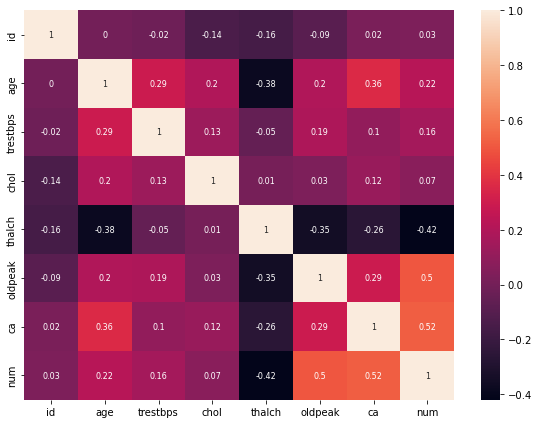

In [113]:
plt.figure(figsize=[8,6])
sb.heatmap(data = data.corr().round(2), annot = True, annot_kws = {"size":8})
plt.tight_layout()
plt.show()

#### Finding significant difference in chloestrol levels between patients with and without heart disease

In [114]:
disease = data[data['num']>0]['chol']

In [115]:
no_disease = data[data['num']==0]['chol']

In [116]:
t_stats, p_value = stats.ttest_ind(disease, no_disease)
print("T-Statistic:", t_stats)
print("P-Value:", p_value)

T-Statistic: 1.1633312359897947
P-Value: 0.24562891817755445


In [117]:
def confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data)
    num = len(data)
    std_error = std/np.sqrt(num)
    interval = stats.t.interval(0.95, num-1, loc = mean, scale = std_error)
    return interval

In [118]:
interval_disease = confidence_interval(disease)
print("Confidence interval for cholestrol levels with heart disease", interval_disease)

Confidence interval for cholestrol levels with heart disease (242.0503566005043, 259.10072253618637)


In [119]:
interval_nodisease = confidence_interval(no_disease)
print("Confidence interval for cholestrol levels without heart disease", interval_nodisease)

Confidence interval for cholestrol levels without heart disease (235.12646978204384, 251.86103021795617)


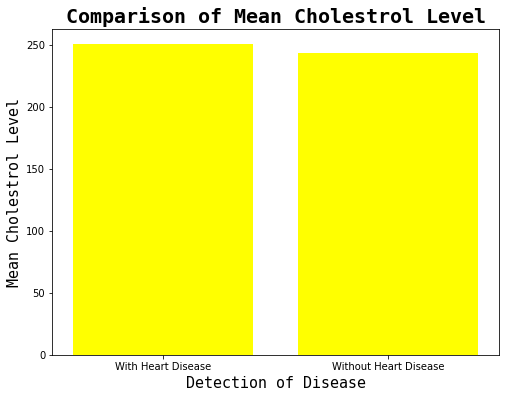

In [140]:
# plotting the results

plt.figure(figsize=[8,6])
labels = ['With Heart Disease', 'Without Heart Disease']
values = [disease.mean(), no_disease.mean()]
plt.bar(labels, values, color = 'yellow')
plt.title('Comparison of Mean Cholestrol Level', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Detection of Disease', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Mean Cholestrol Level', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

##### From the above analysis and findings we can conclude that there is no significant difference in cholestrol levels
##### between patients with and without heart disease.